In [7]:
#Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Importando arquivo
df = pd.read_csv('Salary_dataset.csv')

**Analise Exploratoria dos dados**
-------------------------------------------------

In [9]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [10]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [11]:
#São 3 colunas , 30 linhas , sem valores nulos e os tipos corretos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [12]:
#Analise estatistica
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [13]:
#Excluindo coluna desnecessária
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [14]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


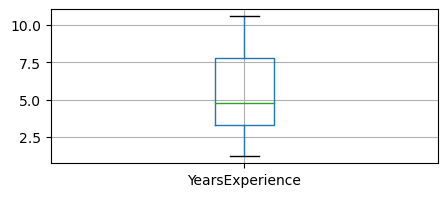

In [15]:
#Verificando se contém Outliers
df.boxplot(['YearsExperience'], figsize = (5,2))
plt.show()

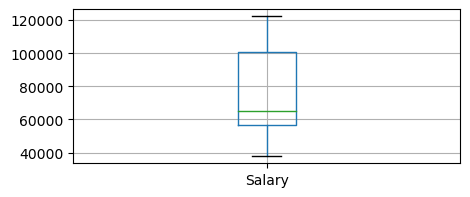

In [16]:
df.boxplot(['Salary'], figsize = (5,2))
plt.show()

In [17]:
#Separando colunas para explorar a Correlação dos dados
import numpy as np

eixo_x = df.iloc[:,0].values
eixo_y = df.iloc[:,1].values

Correlação = np.corrcoef(eixo_x , eixo_y)

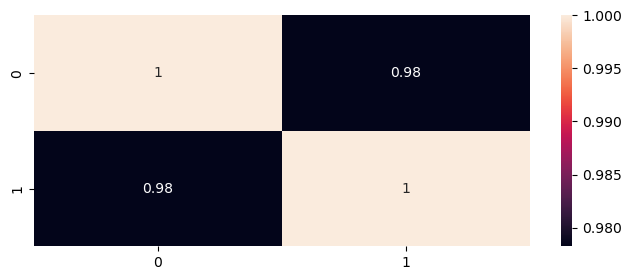

In [21]:
plt.figure(figsize = (8,3))
sns.heatmap(Correlação , annot = True)
plt.show()

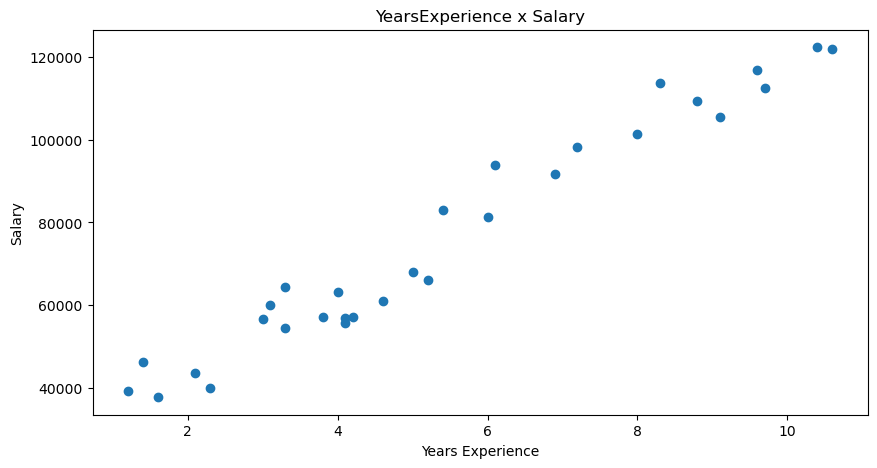

In [65]:
#Analisando grafico linear
plt.figure(figsize = (10, 5))
plt.scatter(eixo_x , eixo_y , )
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('YearsExperience x Salary')
plt.show()

**Separando dados de treino x teste**
-------------------------------

In [43]:
x = eixo_x.reshape(-1, 1)
y = eixo_y.reshape(-1, 1)

In [44]:
from sklearn.model_selection import train_test_split

In [51]:
x_treino, x_teste , y_treino , y_teste = train_test_split(x , y , test_size = 0.30)

In [52]:
print(len(x_treino), len(x_teste))

21 9


In [53]:
from sklearn.linear_model import LinearRegression

In [58]:
#Avaliando a Curacia do modelo de treino
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

modelo.score(x_treino , y_treino)

0.9581054361639967

In [62]:
previsão = modelo.predict(x_teste)

**Avaliando modelo de previsão**
----

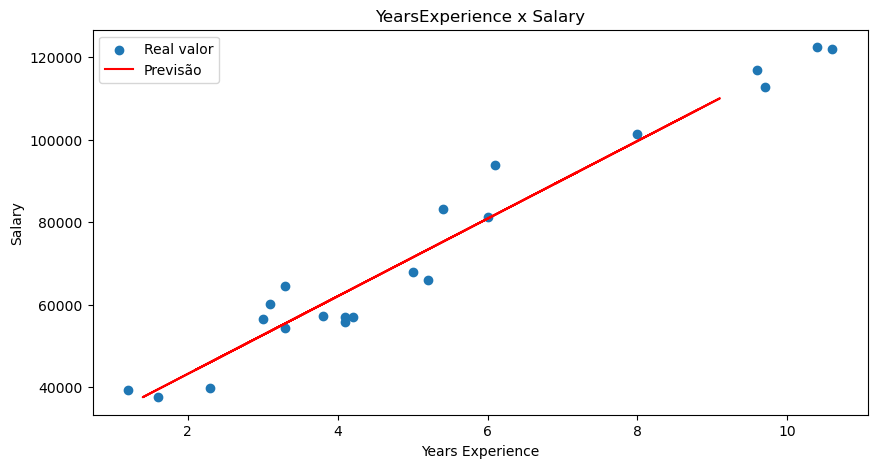

In [67]:
plt.figure(figsize = (10, 5))
plt.scatter(x_treino , y_treino, label = 'Real valor')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('YearsExperience x Salary')
plt.plot(x_teste , modelo.predict(x_teste), color = "red" , label = 'Previsão')
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
print(r2_score(y_teste , previsão))
print(mean_squared_error(y_teste , previsão))

0.9492568602034608
35114471.65388062
